# Homework 1 

## General Instructions
 
* To pass this assignment requires to complete the Jupyter notebook by
    + providing correct answers to all the theoretical exercises, and by
    + providing complete and runnable computer code producing the correct results to all the computational problems.

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.
* Please provide also a short summary and discussion of your results 
  including the requested output (e.g., tables, graphs etc.).

* Up to 3 students can jointly submit the solutions. **Only 1 student from each group** is supposed to submit them. Please indicate the other members
of your group in the comment field appearing when you submit your files in
Cambro.

* Deadline for submission of your solutions is **26th of November by 17:00**.

##### Happy coding!

Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `custom-style-2017.css` from the `lab/styles` Cambro folder. Note that the following code snippet assumes that the file resides inside the folder `../styles/` relative to the folder where you stored this notebook on you computer.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom-style-2017.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

## Problem 1
Find at least 4 more "famous" partial differential equations (PDE) with
one in each category "Linear PDE, Non-linear PDE, Linear System,
Non-linear system". Give a brief description of the underlying phenomena
modeled by the PDE.

## Problem 2

In Lecture 2, we introduced the __central finite difference operators__
$$
\partial^0 u(x)
=  \dfrac{u(x+h) - u(x-h)}
{2h}
\approx u'(x)
$$
and
$$
\partial^+ \partial^- u(x)
=  \dfrac{u(x+h) - 2 u(x) + u(x-h)}
{h^2}
\approx u''(x)
$$
as an approximation of the first and the second order derivative $u'(x)$
and
$u''(x)$, respectively.

Recall that for  $u \in C^k([0,1])$, the 
Taylor expansion of $u$ around $x$ is given by
$$
u(x+h) = u(x) + h u'(x) + \dfrac{h^2}{2!} u''(x) 
%+\dfrac{h^3}{3!} u^{(3)}(x)
+ \ldots 
+ \dfrac{h^{k-1}}{(k-1)!} u^{(k-1)}(x)
+ \dfrac{h^{k}}{k!} u^{(k)}(\xi)
$$
for some $\xi \in (x,x+h)$. 
Since $u \in C^k([0,1])$, the remainder term 
$\dfrac{h^k}{k!} u^{(k)}(\xi)$ is uniformly bounded with respect to 
$\xi$ and thus we can simply write
$$
u(x+h) = u(x) + h u'(x) + \dfrac{h^2}{2!} u''(x) 
%+\dfrac{h^3}{3!} u^{(3)}(x)
+ \ldots 
+ \dfrac{h^{k-1}}{(k-1)!} u^{(k-1)}(x)
+ \mathcal{O}(h^{k})
$$

**a)** Use Taylor expansion to show that
for 
$u \in C^3([0,1])$
$$
\| \partial^0u(x) - u'(x) \|_{C([0,1])}
\leqslant 
C h^2
 \| u^{(3)} \|_{C([0,1])}
$$

**b)** Similarly, demonstrate that
$$
\| \partial^+ \partial^-u(x) - u''(x) \|_{C([0,1])}
\leqslant 
C h^2
 \| u^{(4)} \|_{C([0,1])}
$$
assuming that
$u \in C^4([0,1])$.

## Problem 3
In this problem set you are asked to solve the Poisson problem
$$
- u''  = f \quad \text{in } (0,1)
$$
numerically for various types of boundary conditions.

**a)** Start with implementing the finite difference method (FDM)
from Lecture 2 using the right-hand side
$$
f = (2\pi)^2 \cos(2 \pi x)
$$
and boundary conditions
$$u(0) = u(1) = 1.$$
Plot the solutions for different mesh sizes $h = 1/N$
with $N = 4, 8, 16, 32, 64$ in the *same* plot. 
Find the *exact* analytical solution $u$ to the given Poisson problem (Hint: it should be very similar to $f$) and plot it for $N = 64$ into the same figure. 
Does your computed discrete solution $U$ converge to $u$?

**b)** Next, we switch to a Neumann boundary condition
on the left endpoint; that is that we consider the following
the boundary conditions:
$$ -u'(0) = 0, \quad u(1) = 1.$$
Modify your FDM solver to incoporate the Neumann condition based on the one-side apprioximation
$$ -u'(0)\approx \frac{u(0) - u(h)}{h}$$
Conduct a similar numerical study as in part a). What do you observe regarding the accuracy of the
method?

**c)** Now use Neumann boundary conditions everywhere; that is, take
$$ -u'(0) = 0,\quad u'(1) = 0$$
and try to solve the resulting Poisson problem.
What happens when you try to solve the linear algebra system? Why? (Hint: Is this problem well-posed?)

### Useful code snippets

As most of you are familiar with MATLAB but not so familar
with Python, we provide a number of code snippets to get you
started in Python. Three dots $\ldots$ indicate places where you have
to fill in code. Note that this outline provides only a very rudimentary
inefficient implementation to begin with and we will refine
our methods while progressing towards more advanced and larger problems.

We start with importing the necessary scientific libraries
and define a name alias for them.

In [2]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

Next we define the grid points.

In [21]:
# Number of equally spaced subintervals
N = 64
# Mesh size
h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
# Define N+1 grid points via linspace which is part of numpy now aliased as np 
x = np.linspace(0,1,N+1)

Now define matrix $A$ and right-hand side vector $F$.
We will first fill in the values that will be unchanged for different
boundary conditions.

In [26]:
# Define a (full) matrix filled with 0s.
A = np.zeros((N+1, N+1))

# Define tridiagonal part of A by for rows 1 to N-1
for i in range(1, N):
    A[i, i-1] = -1
    A[i, i+1] = -1
    A[i, i] = 2
    
# Define right hand side. Instead of iterating we
# use a vectorized variant to evaluate f on all grid points
# Look out for the right h factors!

F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)

# Note that F[0] and F[N] are also filled!

#\dfrac{u_i+1 - 2 u_i + u_i-1}{h^2}
#(2\pi)^2 \cos(2 \pi x)

Last step to set up the system is to take the boundary conditions into account by modifying $A$ and $F$ properly.

In [33]:
# Left boundary
A[0,0] = 1
F[0] = 1

# Right boundary
A[N,N] = 1
F[N] = 1

Now we solve the linear algebra system $AU = F$ and plot the results.

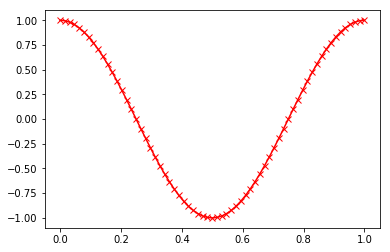

In [34]:
U = la.solve(A, F)
#  "x-r" means mark data points as "x", connect them by a line and use red color
plt.plot(x, U, "x-r")

With these snippets in place you should be able to solve Computer Problem 1
but don't hesitate to ask if you are wondering about something!

## Problem 4

The goal of this problem is to investigate the numerical error introduced by the FDM more quantitatively and to familiarize us with the **method of manufactured solution**.

The idea is to assess the accurracy and correctness of a PDE solver implementation by constructing a know reference solution which solves the PDE problem at hand. This can be simply done by picking a meaningful and not to boring analytical solution
and explicitly calculate the data which need to be supplied, e.g.,
the right-hand side or boundary values for various boundary condition.

For instance, taking the function $u(x) = x + \cos(2 \pi x)$, we can simply calculate that
\begin{align}\notag
 u'(x) &= 1 - 2\pi \sin(2\pi x)
 \\ \notag
 u''(x) &= - (2\pi)^2 \cos(2\pi x)
\end{align}
and thus $u$ satisfies the Poisson problem
$$
-u''(x) = (2\pi)^2 \cos(2\pi x)
$$
with boundary conditions
$$
-u'(0) = -1, \quad u(1) = 2.
$$

With a known reference solution at hand we can compute
the error vector $u_i - U_i$ at the grid points $\{x_i\}_{i=0}^N$
for a series of successively refined grid, e.g. by taking
$N = 4\cdot2^k$ for $k = 0, 1, 2, 3$ etc.

Reducing the mesh size $h$ by half allows us to easily compute
the **experimental order of convergence (EOC)**,
that is the observed error reduction in the numerical solution
when passing from a coarser mesh with mesh size $h$ to
to a finer mesh with $h/2$.
The EOC can then be compare with the theoretically predicted error reduction (if known).

For instance, if you know that the discretization error $E(h)$ given on mesh
with mesh size $h$ and measured in some norm $ \| \cdot \| $ behaves like 
$\| E(h) \| \sim h^k$, you can conclude that  
$$
\dfrac{\|E(h/2)\|}{\|E(h)\|} \sim \dfrac{(h/2)^k}{h^k} = (1/2)^k
$$
when passing from $h$ to half the mesh size $h/2$. Taking the logarithm
of the last equation shows 
$$
k \sim \dfrac{\ln(\|E(h)\|/\|E(h/2)\|)}{\ln 2}. 
$$
(Verify this!)
Thus the EOC for each mesh size h is measured by the 
$$
EOC(h) = \dfrac{\ln(\|E(h)\|/\|E(h/2)\|)}{\ln 2}.
$$

Alternatively, you can do a log-log plot of your error as function of $h$,
that is plot $\ln (\| E(h)\|)$ againts $\ln(h)$. Then the slope of this
plot should be $\sim k$ if we expect the method to be of convergence order $k$.

a) Use this approach to verify your FDM program developed in Problem 3 a) by computing the error for $N= 4, 8, 16, 32, 64$ in the maximum norm.
Give the corresponding $\log$-$\log$ plot and report your convergence order.
Do you achieve 2nd order convergence?

b) Next, repeat the same experiment for the Poisson problem 3b) with
mixed Dirchlet/Neumann boundary conditions. What EOC do you observe?
Can you explain it?

c) Finally,  repeat task b) but now use $u(x) = x + \sin(2 \pi x)$.
Start with computing the corresponding right-hand side $f$, Neumann condition in $x=0$ and Dirichlet condition in $x=1$. What EOC do you observe now? **Bonus:** Can you explain why there is a difference in the observed EOC compared to the results from b)?

### Useful code snippets

While we won't use the Python data analysis libray `pandas` extensively in this course, it comes in very handy if you want to print all kinds of data in a pretty way.

Here is an example of how to use `pandas` to diplay convergence rate tables
nice within the Jupyter notebook.

In [ ]:
# Import pandas 
import pandas as pd
# and numpy (only to provide a complete example here)
import numpy as np

# Import functions which provides nice rendering of data.
from IPython.display import display, HTML

# Create a list refinement levels
refs = [ N**2 for N in range(2,9)]
print("Refinements")
print(refs)

# Generating some dummy data just for illustration purpose.
# You have to make your own list/arrays containing the 
# computed errors an EOC.

errors = np.random.randn(7)
eocs = np.random.randn(7)
print(errors)
print(eocs)

# Make a dictionary containing the data set
# consisting of a column labeled "Errors"
# and one labeled "EOC"
data = {"Errors":errors, "EOC":eocs}

# Create a dataframe (basically just a 2D table in our case)
# and use the refinement numbers as index
df = pd.DataFrame(data, index=refs)

# A Python dict does not store the keys in a sorted way.
# The next line sorts the columns according the list
#["Errors", "EOC"] 
df = df[["Errors", "EOC"]]

# Finally give the index column a name as well
df.index.name="Refinement level"

# 2 possibilities to pretty print the dataframe
display(df)
HTML(df.to_html())

## Problem 5

In the final computer exercise you are asked to extend your FDM solver in order to compute a solution to the *Advection-Diffusion problem*
$$
- \epsilon u''(x) + b u'(x) = f(x) \quad \text{for } x \in (0,1),
\\
u(0) = u(1) = 0,
$$
with $b = 1$ and various $\epsilon$ tending $0$. While for $\epsilon > 0$,
the problem is clearly a 2nd order problem, its characteristics
change drastically for $\epsilon \to 0$. Formally, the limit equation
is given by the **first order** problem
$$
b u'(x) = f(x) \quad \text{for } x \in (0,1)
$$
and we see immediately that only *one* boundary condition should
be required in the limit case. (Convince yourself by assuming that $f = 1$ and trying to compute a solution). It turns out that it is natural to impose a Dirichlet boundary condition $u(0) = u_0$ only at the "inflow point" $x(0)$ and thus
the "outflow point" $u(1) = u_1$ becomes "superfluous" when $\epsilon \to 0$. Here, we will study what happens to our FDM solver when we gradually approache this limit case.

**a)** Compute $f$ such that
\begin{align*}
  u(x)
  = x - 
  \dfrac{e^{(x-1)/\epsilon} - e^{-1/\epsilon}}
  {1 - e^{-1/\epsilon}}
\end{align*}
is an exact solution for $b = 1$ and arbitrary $\epsilon$
(Hint: $f$ should not look too complicated...).

**b)**
Start with using the symmetric/central difference operator
$$
\partial^0 U_i = \dfrac{U_{i+1} - U_{i-1}}{2h}
$$
to discretize the first order derivative $b u'(x)$.
How does the resulting matrix system look like?
Adapt your FDM solver from Problem 1 accordingly and
verify your implementation employing the method of manufactured solution from Problem 4.

**c)** Now repeat the numerical experiment and compute
a numerical solution $U_{\epsilon}$ for
$\epsilon = 0.1, 0.01. 0.001$ and at least $4$ successively refined
grids. For each $\epsilon$ provide a plot including the exact
solution and the computed approximations. What do you observe?

Report the EOC, this time
in a 2 column table with the first column reporting the mesh size
and the second column reporting the computed error. Is the error
reduced by a factor $4$ as expected from a 2nd order convergent method?
Can you recover order $2$ by making the meshes even finer?

**d**) Finally, again, conduct the same experiment
after replacing $\partial^0$ by 1) $\partial^+$ and 2) $\partial ^-$.
Describe your observations of the discrete solution behavior.
Which variant gives the most satisfying/robust solution
for small $\epsilon$?